# STUDENT PERFORMANCE INDICATOR

# 1. Problem Statement

- The goal of the project is to understand the relation between the student's test scores and their Gender, Ethnicity, Parent's education, Lunch and Test preparation course.

# 2. Data Collection

- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

# 2.1 Importing Data

In [2]:
# import requirements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
# loading dataset 

df = pd.read_csv(r'data/student_data.csv')

# 3. Data quality Check

- Dataset imformation
- Duplicate value check
- Missing Value check 
- Data Type Check


# 3.1 Dataset Information

In [9]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
df.shape

(1000, 8)

The dataset has 8 unique columns and 1000 rows of information.

Columns-

- Gender : sex of students -> (Male/female)
- Race/ethnicity : Ethnicity of students 
- Parental level of education : Parents' final education 
- Lunch : Having lunch before test (standard or free/reduced)
- Test preparation course : complete or not complete before test
- Math score
- Reading score
- Writing score

# 3.2 Duplicate Value Check

Checking for any duplicate values and removing them from the data

In [8]:
print(df.duplicated().sum())

0


There are no missing values in  the data set.

# 3.3 Missing Value check

Chekign for any missing value in dataset

In [13]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

The dataset has no missing value ion any column.

# 3.4 Data Type Check

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [32]:
# Crearting a list of numeric and categorical columns

numerical_columns = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_columns = [feature for feature in df.columns if df[feature].dtype == 'O']

In [33]:
print('The Numerical Feature are:  ', numerical_columns, "\n")
print('The Categorical Feature are:  ', categorical_columns, "\n")

The Numerical Feature are:   ['math_score', 'reading_score', 'writing_score'] 

The Categorical Feature are:   ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'] 



From the 8 columns in dataset - 

- 5 are categorical
- 3 are numeric (integer)

The data tyoe of each column is correct and we dont need to change and re-assign any data type.

# 4. Exploring Data

Let's check and analyze the values of each columns.

- Unique values in categorical columns
- Basic statisitcs of numeric columns


# 4.1 Unique values in each column

Checking for unique values in each column of dataset.

In [15]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [24]:
#All the unique values for categorical columns

#Gender

print("The unique values in the Gender Column:  ", df['gender'].unique(), "\n")

#Race_ethnicity

print("The unique values in the Race_ethnicity Column:  ", df['race_ethnicity'].unique(), "\n")

#parental_level_of_education

print("The unique values in the parental_level_of_education Column:  ", df['parental_level_of_education'].unique(), "\n")

#lunch 

print("The unique values in the lunch Column:  ", df['lunch'].unique(), "\n")

#test_preparation_course

print("The unique values in the test_preparation_course Column:  ", df['test_preparation_course'].unique())



The unique values in the Gender Column:   ['female' 'male'] 

The unique values in the Race_ethnicity Column:   ['group B' 'group C' 'group A' 'group D' 'group E'] 

The unique values in the parental_level_of_education Column:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

The unique values in the lunch Column:   ['standard' 'free/reduced'] 

The unique values in the test_preparation_course Column:   ['none' 'completed']


# 4.2 Numeric Column Statistics

In [25]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight-

- The mean of all three math, reading and writing score are veryc close and in between - 66 to 69.2
- The standard deviation also similar within range of - 14.6 to 15.2 
- The maximum score for all three are - 100

# 4.3 Adding 'Total Score' and 'Average Score' columns

- total_score  = math_score + reading_score + writing_score (total score of a student)

- average_score = total_score / 3 (average score of a student across 3 subjects)

In [54]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']

df['average_score'] = round(df['total_score']/3,2)

numerical_columns = [feature for feature in df.columns if df[feature].dtype != 'O']


df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [39]:
# Statisitcs for the new columns

df[['total_score', 'average_score']].describe()

,total_score,average_score
count,1000.000000,1000.000000
mean,203.312000,67.770580
std,42.771978,14.257311
min,27.000000,9.000000
25%,175.000000,58.330000
50%,205.000000,68.330000
75%,233.000000,77.670000
max,300.000000,100.000000


Insight- 

- The maximum total and average marks are 300, 100 respectively.
- The mean toal score is around 203 and mean average score is around 67.7

# 5. Data Visualization

Visualizing the data and features and finding their relation with a visual representation.

- Univariate Analysis
- Bivariate Analyis
- Multivaraite Analysis

# 5.1 Univariate Analysis

5.1.1 Categorical Features


 Countlot and Pie Chart for gender


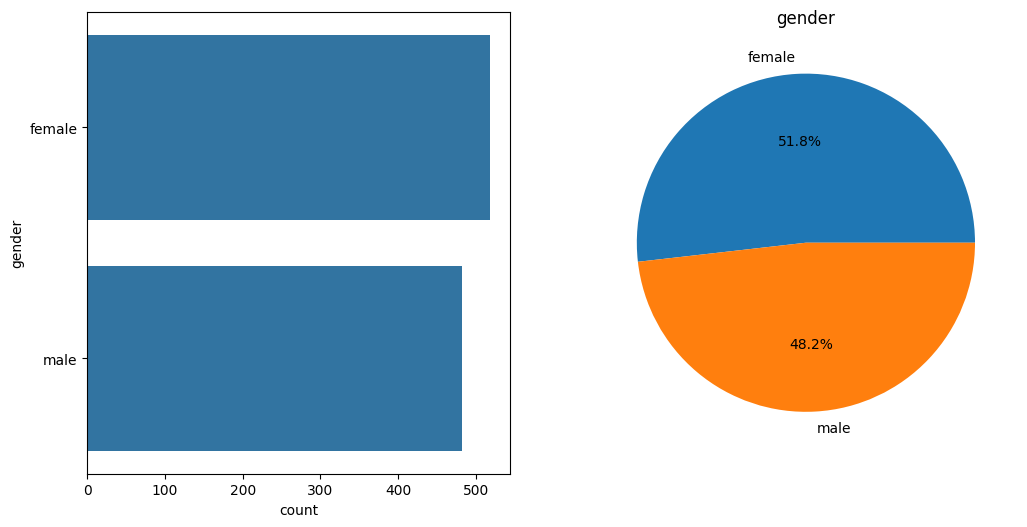


 Countlot and Pie Chart for race_ethnicity


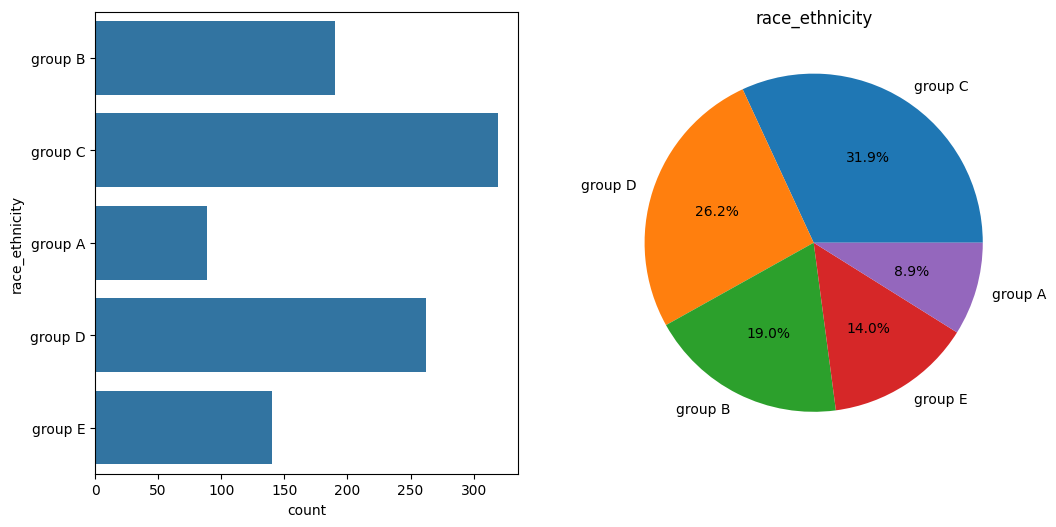


 Countlot and Pie Chart for parental_level_of_education


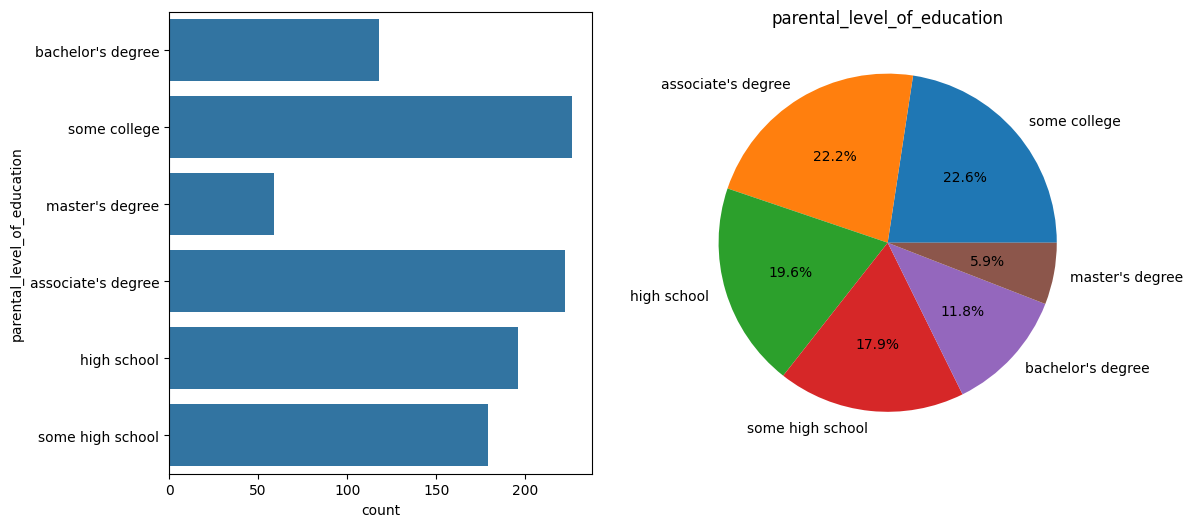


 Countlot and Pie Chart for lunch


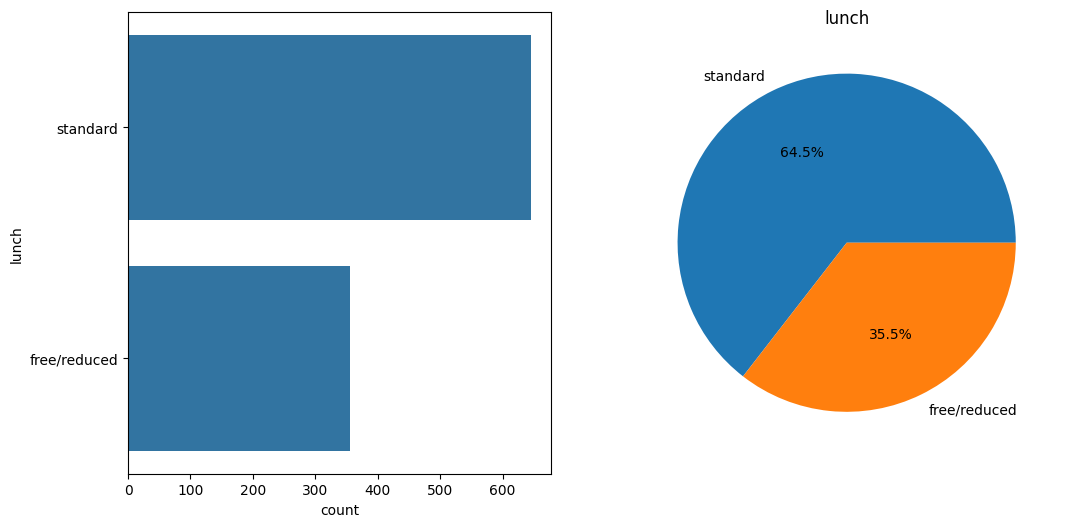


 Countlot and Pie Chart for test_preparation_course


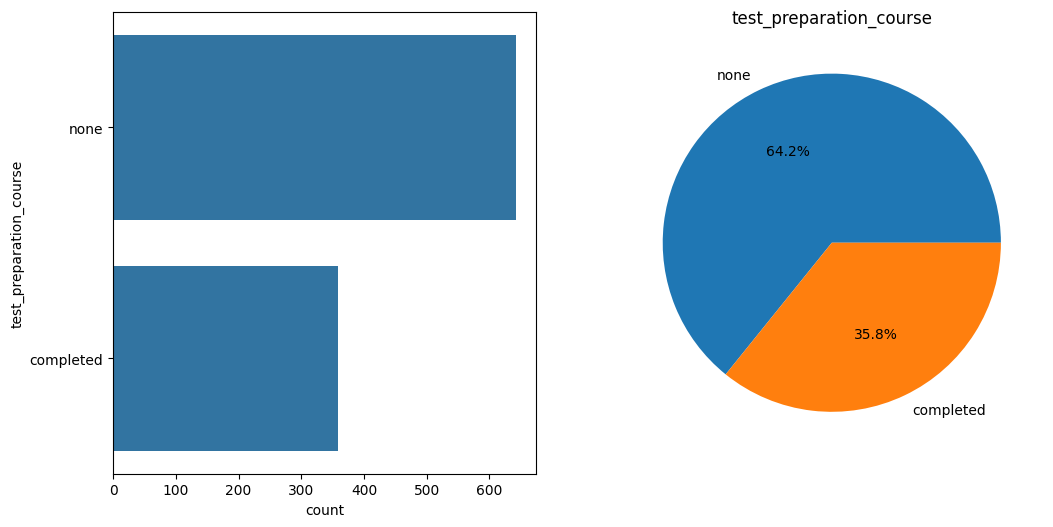

In [69]:
#Countplot and pie charts for the Categorical features

for feature in categorical_columns:
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


    sns.countplot(df[feature], ax = ax1)
    plt.pie(df[feature].value_counts(), labels = df[feature].value_counts().to_dict().keys(), autopct='%1.1f%%')
    print(f"\n Countlot and Pie Chart for {feature}")
    plt.title(feature)
    plt.show()


Insight-

- Gender: Majority of students were female but just by a small margin of 3.6%

- Race/Ethnicity: Majority of studens falls udner Group D or Group C of race/ethnicity

- Parental Education Level: Majority of parents has highesst education level of some college or associates's degree

- Lunch: 65% of the students has standard lunch

- Test preparation course: 64% of students dont have compelted test preparation course


5.1.2 Numerical Features


 Countlot and Pie Chart for math_score


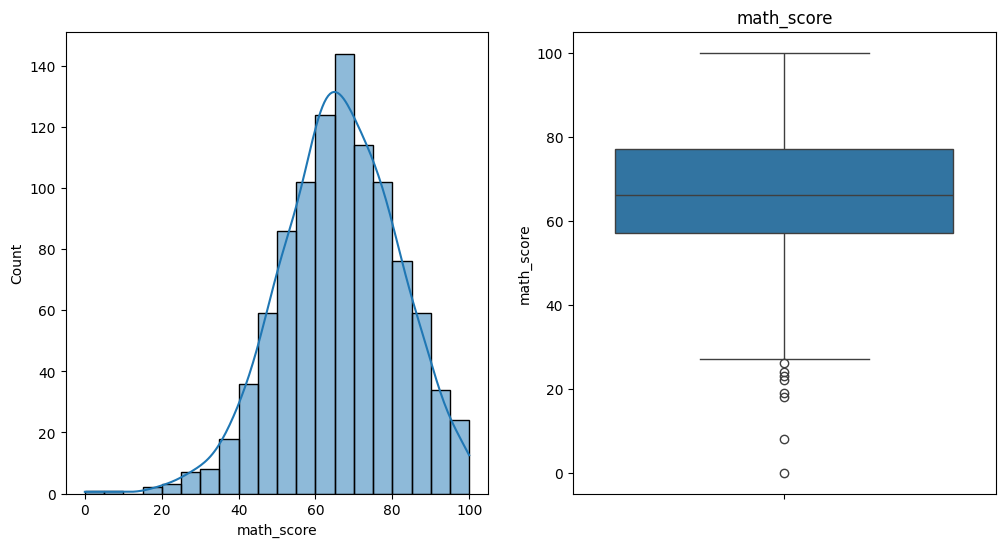


 Countlot and Pie Chart for reading_score


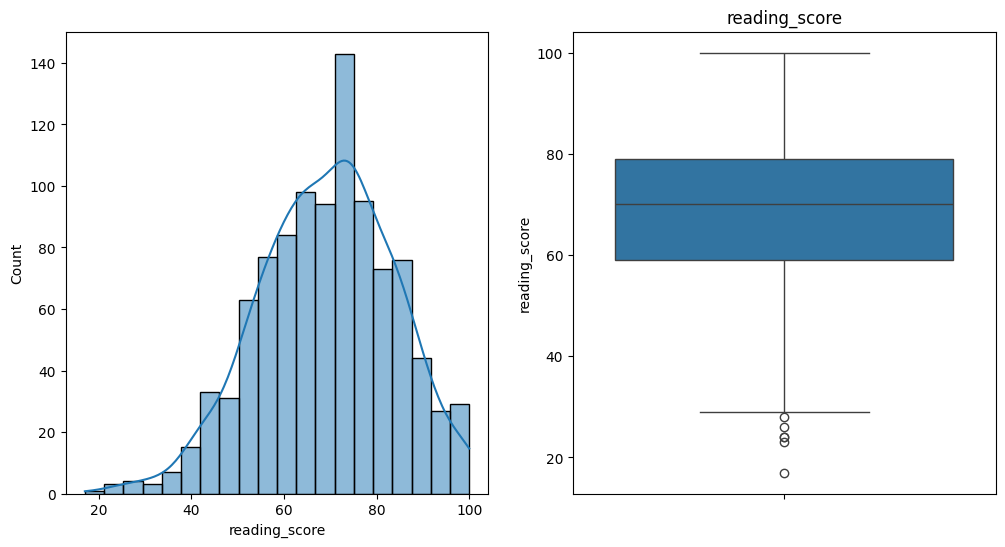


 Countlot and Pie Chart for writing_score


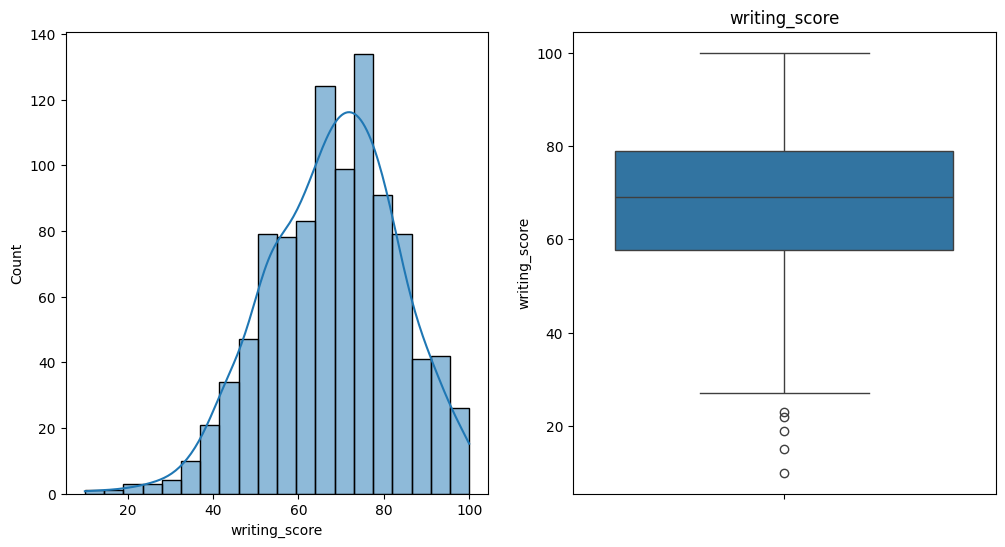


 Countlot and Pie Chart for total_score


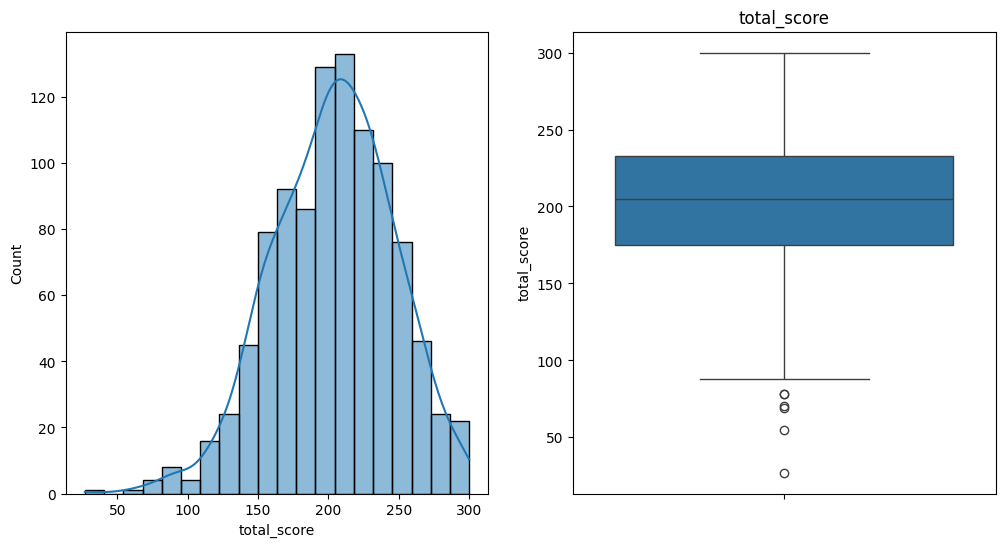


 Countlot and Pie Chart for average_score


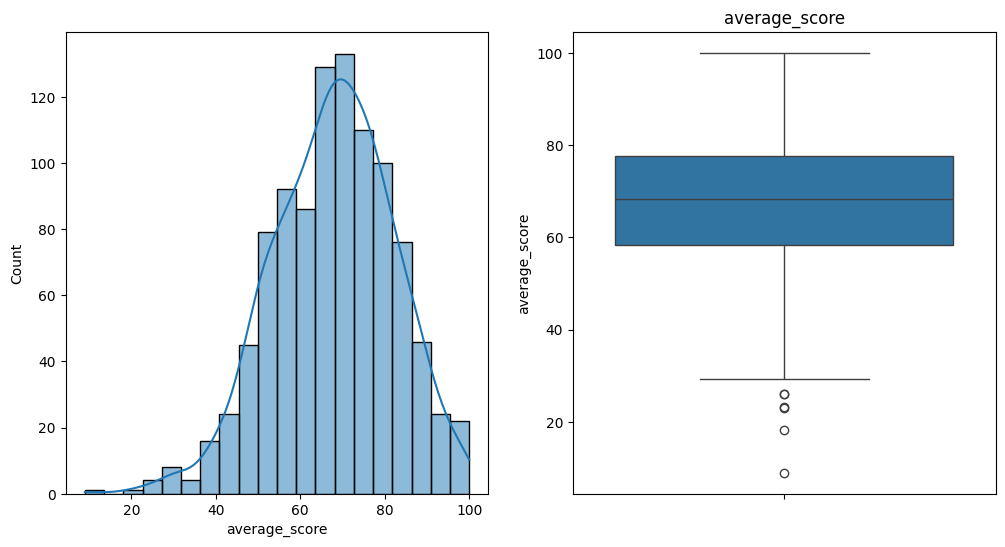

In [70]:
#histograms, KDE and box plots for numerical features

for feature in numerical_columns:

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    sns.histplot(df[feature], kde=True, bins =20, ax = ax1)
    sns.boxplot(df[feature])

    print(f"\n Countlot and Pie Chart for {feature}")
    plt.title(feature)
    plt.show()
    


# 5.2 Bivariate Analysis

Let's find the relation between a students total or average score with all the other features.

Studnet's score by Gender


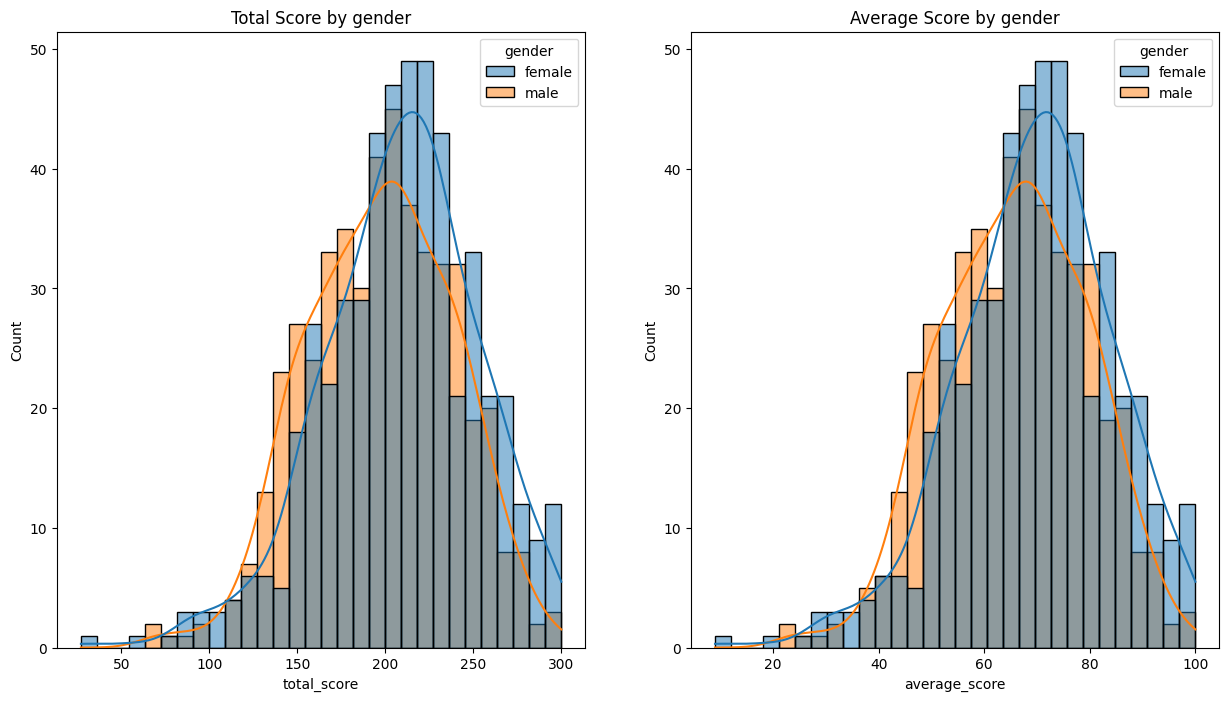

In [121]:
#Gender and Total/Average Score

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

sns.histplot(data =df, x = 'total_score', hue = 'gender', kde=True, bins = 30, ax=ax1)
sns.histplot(data =df, x = 'average_score', hue = 'gender', kde=True, bins = 30, ax = ax2)
ax1.set_title('Total Score by gender')
ax2.set_title('Average Score by gender')

print("Studnet's score by Gender")

Female students tend to perform a little better than the male students overall.

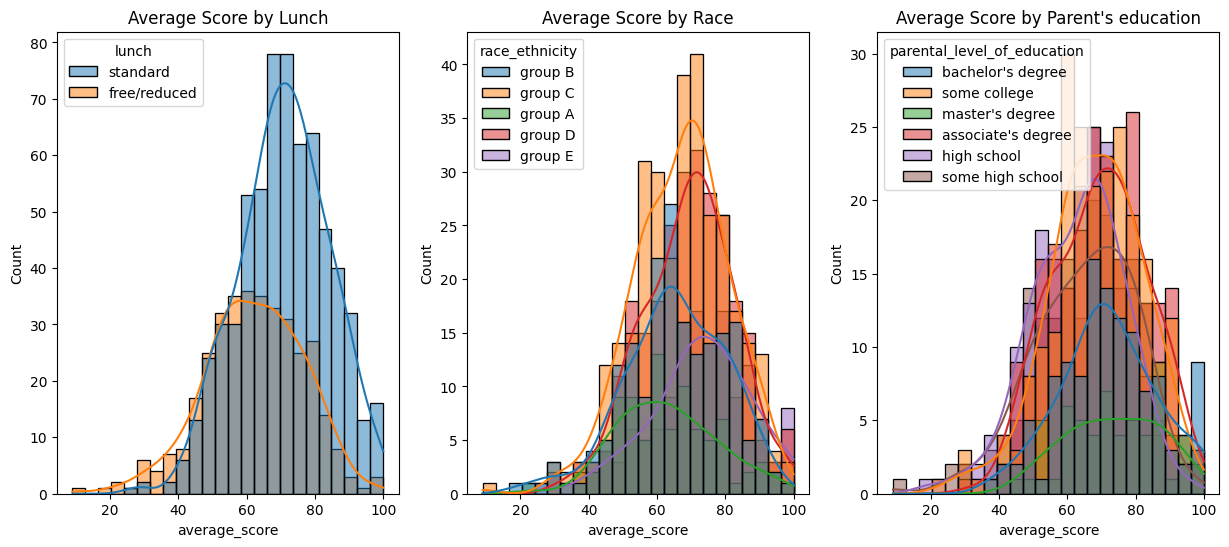

In [122]:
#Relation between Student's score and Lunch and studnet's average score

fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(15, 6))



Insight-

- The student performance of student'swith standard lunch is significantly higher

- The student's of group C and D tends to perform well compared to others

- Student's with parental education of some college, associate's degree and high school performs better

(These results cannot be generalized for a larger scale sibnce our data is of only 1000 students)

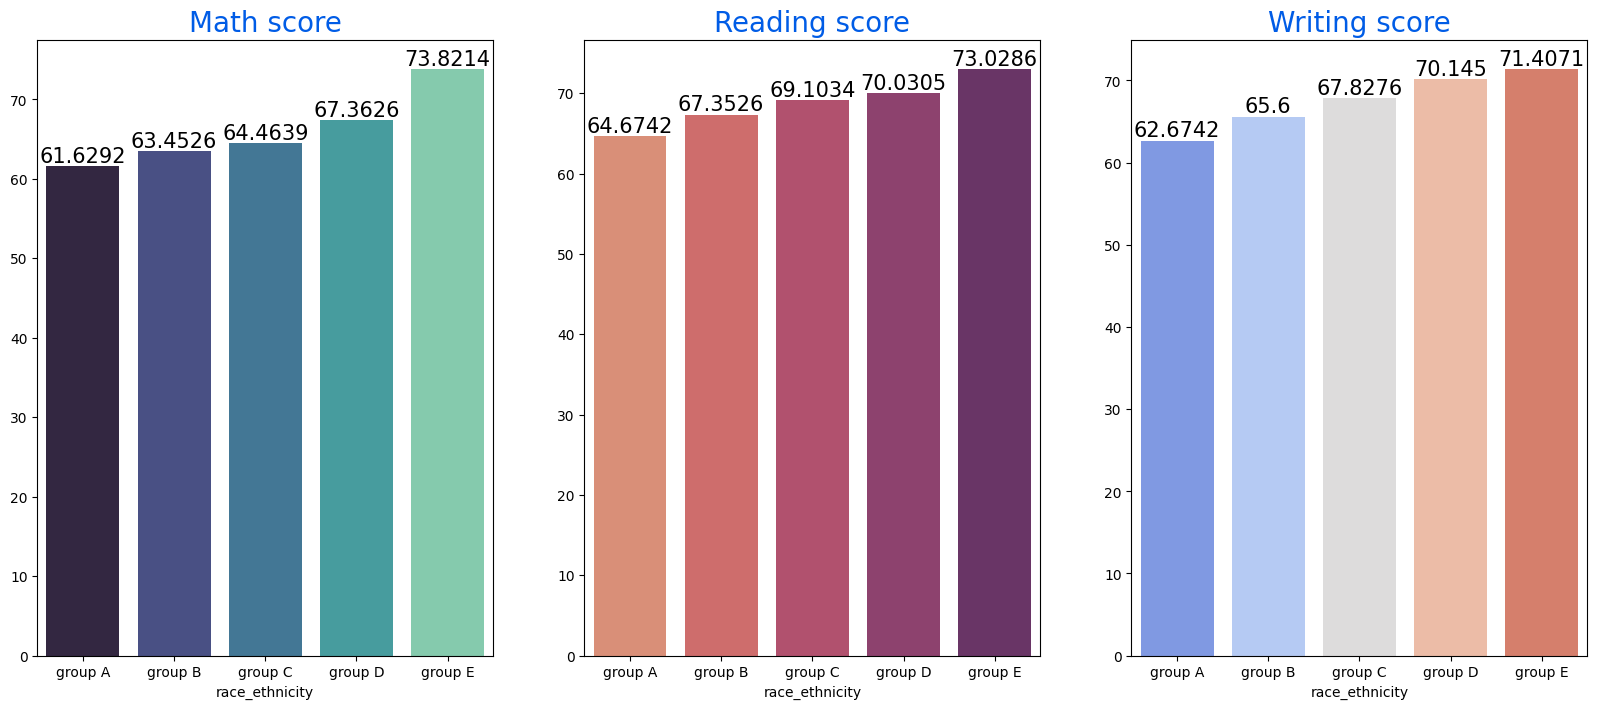

In [124]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)